In [ ]:
import scipy.stats as stats
import numpy as np

x = np.linspace(0, 5, 10, endpoint=False)
y = stats.multivariate_normal.pdf(x, mean=2.5, cov=0.5)

In [ ]:
y

In [ ]:
x

## Matlab output(as ref)
y =

    0.0011
    0.0103
    0.0595
    0.2076
    0.4394
    0.5642
    0.4394
    0.2076
    0.0595
    0.0103


# Test for z-shape mumeric

In [ ]:
%matplotlib qt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

def generate_potential_2d_Zshape_numeric(IN_n_states,flag_visualize):
    """
    The Zshape surface is a weighted sum of 2d Normal distributions and
    exponential functions
    
    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    # Q1: Will we change the limit later? A: Not required, could be optional paras.
    x_min = -2
    x_max = 2
    y_min = -1
    y_max = 3
    # Q2: The length of each range should be the same for now.

    x = np.linspace(x_min,x_max,IN_n_states[0]);
    y = np.linspace(y_min,y_max,IN_n_states[1]);

    #---Hyper-parameters---#
    border_coeff = 1; # Coefficient of borders 
    well_coeff = 10; # Coefficient of wells (larger value makes wells deeper and barrier between them bigger)


    #---PARAMETERS OF NORMAL DISTRIBUTIONS---#
    # Section "Bivariate case" in [https://en.wikipedia.org/wiki/Multivariate_normal_distribution]
    mu_1 = [-1.5,-0.5]
    mu_2 = [1.5,2.5]
    sigm_center_well = 0.4 # Sigma of some of the wells, sigm for sigma
    covar_mat_well = np.diag(np.dot(np.ones((len(IN_n_states))),sigm_center_well))
    ###Debugging
    print(covar_mat_well)

    mu_3 = [-0.5, 0]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_3 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_4 = [0, 1]
    sig = [0.7, 0.7] # Origion: [1, 1] * 0.7, Diagonal one
    ro = -0.8
    colvar_mat_4 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_5 = [0.5, 2]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_5 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    #---INSTANTIATION---#
    potential_numeric = np.zeros(IN_n_states)

    #---Run---#
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            #--Borders (Potential increase to infinity outside of [x_min,x_max] and [y_min,y_max])--#
            border_1 = np.exp(x_min - x[x_id])
            border_2 = np.exp(x[x_id] - x_max)
            border_3 = np.exp(y_min - y[y_id])
            border_4 = np.exp(y[y_id] - y_max)

            #--WELLS--# # This requires multivariate normal distribution generating function
            well_1 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_1, cov=covar_mat_well)
            well_2 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_2, cov=covar_mat_well)
            well_3 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_3, cov=colvar_mat_3) # Numeric expression
            well_4 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_4, cov=colvar_mat_4)
            well_5 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_5, cov=colvar_mat_5)  

            border_contribution = (border_1 + border_2 + border_3 + border_4) * border_coeff
            well_contribution = (well_1 + well_2+ well_3+ well_4 + well_5) * well_coeff

            potential_numeric[x_id,y_id] = border_contribution - well_contribution

    if flag_visualize:
        #assert()
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

    # Sympy
    # TODO

In [ ]:
test_instates = [100,100]

In [ ]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np 
x = test_x
y = test_y
x, y = np.meshgrid(x, y)
z = test_potential
fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.5, aspect=5)


In [ ]:
import numpy as np
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

# Sympy
# TODO

In [ ]:
test_potential, test_x, test_y = generate_potential_2d_spirals_numeric([100,100], 2, True)

In [ ]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

In [ ]:
a = np.array([np.nan] * 100)
a_affix = [1] * 50

In [ ]:
b = range(100)

In [ ]:
%matplotlib inline
a[0:50] = 1
plt.plot(b,a)
plt.show()

In [ ]:
print(a)

In [ ]:
import sympy as spy
from math import exp, atan2
import numpy as np

In [ ]:
spy.symbols?

In [ ]:
a = spy.symbols('a', real=True)

In [ ]:
b = 0.2

In [ ]:
c = b * a * spy.exp(a)

In [ ]:
c.subs(a, 0.2)

In [ ]:
x, y = spy.symbols('x, y', real=True)


In [ ]:
z = atan2(x.subs(x, 2), y.subs(y, 2))

In [ ]:
z

In [ ]:
z = spy.atan2(x,y)

In [ ]:
z.subs?

In [ ]:
a

In [ ]:
x,y

In [ ]:
x

In [ ]:
y

In [ ]:
z = x ** y

In [ ]:
(x**x).diff(x)

In [ ]:
x = 1

In [ ]:
z

In [ ]:
z.subs(x,x)

In [ ]:
z.subs(y,x)

In [ ]:
z

In [ ]:
x, y, z = spy.symbols('x, y, z')

In [ ]:
z = x + y

In [ ]:
z

In [ ]:
z_value = z

In [ ]:
val = z_value.subs([x,y],[1,2])

In [ ]:
import sympy as spy

In [ ]:
value = val.subs({x:1,y:1})

In [ ]:
int(value)

In [ ]:
z

In [ ]:
a = z + z

In [ ]:
a

In [ ]:
#Pre set coeffs
IN_n_states = [100, 100]
IN_number_of_branches = 2

# Hyper Parameters
sigma = 0.35 # Spiral
warping_coeff = 0.01
decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
sinus_to_distance_coeff = 0.1

# Instantiation
potential_numeric = np.zeros(IN_n_states)
n_petals = IN_number_of_branches

#--Symbolic Version of the potential--#
# Requires Sympy

# Symbolic variables for symbolic expression of the potential
x_symb, y_symb = spy.symbols('x_symb, y_symb', real=True)

# Transform coordinates from (x, y) to (angle, Distance)
angle_symb = spy.atan2(x_symb, y_symb)
distance_squared_symb = x_symb ** 2 + y_symb ** 2

# Use the chosen shape function
r_symb = (spy.sin((angle_symb + warping_coeff * distance_squared_symb) * n_petals) * sinus_to_distance_coeff * distance_squared_symb + 2)

# Apply the formula
potential_symbolic = -1*spy.exp( -1/2*(1)/(sigma*r_symb)**2)*(1+decrease_coeff*distance_squared_symb)

In [ ]:
val.subs?

In [ ]:
potential_symbolic.subs({x:1,y:1})

In [ ]:
val.evalf(subs={x_symb:2,y_symb:2})

In [ ]:
val

In [ ]:
from time import time
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    start = time()
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])
    end = time()
    print("Time: ", end - start)
    # Hyper Parameters
    start = time()
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1
    end = time()
    print("Time: ", end - start)
    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return x, y, potential_numeric


def generate_potential_2d_spirals_symbolic(IN_n_states,IN_number_of_branches,flag_visualize):
    # Sympy
    start = time()
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_symbolic_value = np.zeros(IN_n_states)
    n_petals = IN_number_of_branches

    #--Symbolic Version of the potential--#
    # Requires Sympy

    # Symbolic variables for symbolic expression of the potential
    x_symb, y_symb = spy.symbols('x_symb, y_symb', real=True)

    # Transform coordinates from (x, y) to (angle, Distance)
    angle_symb = spy.atan2(x_symb, y_symb)
    distance_squared_symb = x_symb ** 2 + y_symb ** 2

    # Use the chosen shape function
    r_symb = (spy.sin((angle_symb + warping_coeff * distance_squared_symb) * n_petals) * sinus_to_distance_coeff * distance_squared_symb + 2)

    # Apply the formula
    potential_symbolic = -1*spy.exp( -1/2*(1)/(sigma*r_symb)**2)*(1+decrease_coeff*distance_squared_symb)
    end = time()
    print("Time generating the potential: ", end - start)
    # Symbolic derivatives with respect to x and y
    dpotsym_dx = potential_symbolic.diff(x_symb)
    dpotsym_dy = potential_symbolic.diff(y_symb)

    # Compute the expression over our discrete set of bins for checking purposes
    # x = np.linspace(x_min, x_max, IN_n_states[0])
    # y = np.linspace(y_min, y_max, IN_n_states[1])
    start = time()
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):
            start = time()
            potential_symbolic_value[x_id, y_id] = potential_symbolic.evalf(n=10,subs={x_symb:x[x_id], y_symb:y[y_id]})
            #print("Elapsed", time() - start )

    potential_symbolic_value = potential_symbolic_value - np.min(potential_symbolic_value[:]) # Shift so that minimum=0
    potential_symbolic_value = potential_symbolic_value/np.sum(potential_symbolic_value[:]) # Normalize at the end because used non-normalized shape function r.
    end = time()
    print("Time substituting the discrete values: ", end - start)
    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_symbolic_value
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)

    return x, y, potential_symbolic_value, potential_symbolic


In [ ]:
%matplotlib qt

In [ ]:
x_spy, y_spy, potential_spy, potential_func = generate_potential_2d_spirals_symbolic(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

In [ ]:
x_num, y_num, potential_num = generate_potential_2d_spirals_numeric(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

In [ ]:
z = spy.symbols('z')

In [ ]:
from multiprocessing import Pool
from itertools import combinations
import numba as nb

In [ ]:
x_test = np.linspace(0,1,10)
y_test = np.linspace(0,1,10)

def add_func(*inputs):
    x = inputs[0]
    y = inputs[1]
    print("x+y:")
    return x + y

# Serial runtime:


def test_func_serial():
    start = time()
    for x in x_test:
        for y in y_test:
            test_result = add_func(x, y)
    end = time()

    print("Serial Runtime is:", end - start)






In [ ]:
# Mock list for parallel
list_xy = []
for x in x_test:
    for y in y_test:
        list_xy.append([x,y])
# Parallelization runtime:
print("I am running")
start = time()
n_threads = 2
print("threads done")
d = Pool(processes=int(n_threads))
print("pool done")
striding = d.map(add_func, list_xy)
print("calculating done")
d.close()
d.join()

end = time()

In [ ]:
test_func_serial()
test_func_parallel()

In [ ]:
a = [1,2,3]
b = [4,5,6]
[t for t in a]
[k for k in ]
[[t, k] for t, k in combinations(a,b)]

In [ ]:
combinations?

In [ ]:
import itertools
list1=['a','b','c']
list2=[1,2]

[list(zip(x,list2)) for x in itertools.permutations(list1,len(list2))]

In [ ]:
c = np.meshgrid(a,b)

In [ ]:
np.arange(0,100)

In [ ]:
np_vec_add_func = np.vectorize(add_func)

In [ ]:
outputs = np_vec_add_func(1,2)

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy
#----Utils----#


def generate_potential_2d_Zshape_numeric(IN_n_states,flag_visualize):
    """
    The Zshape surface is a weighted sum of 2d Normal distributions and
    exponential functions
    
    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -2
    x_max = 2
    y_min = -1
    y_max = 3

    x = np.linspace(x_min,x_max,IN_n_states[0]);
    y = np.linspace(y_min,y_max,IN_n_states[1]);

    #---Hyper-parameters---#
    border_coeff = 1; # Coefficient of borders 
    well_coeff = 10; # Coefficient of wells (larger value makes wells deeper and barrier between them bigger)


    #---PARAMETERS OF NORMAL DISTRIBUTIONS---#
    # Section "Bivariate case" in [https://en.wikipedia.org/wiki/Multivariate_normal_distribution]
    mu_1 = [-1.5,-0.5]
    mu_2 = [1.5,2.5]
    sigm_center_well = 0.4 # Sigma of some of the wells, sigm for sigma
    covar_mat_well = np.diag(np.dot(np.ones((len(IN_n_states))),sigm_center_well))
    ###Debugging
    print(covar_mat_well)

    mu_3 = [-0.5, 0]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_3 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_4 = [0, 1]
    sig = [0.7, 0.7] # Origion: [1, 1] * 0.7, Diagonal one
    ro = -0.8
    colvar_mat_4 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_5 = [0.5, 2]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_5 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    #---INSTANTIATION---#
    potential_numeric = np.zeros(IN_n_states)

    #---Run---#
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            #--Borders (Potential increase to infinity outside of [x_min,x_max] and [y_min,y_max])--#
            border_1 = np.exp(x_min - x[x_id])
            border_2 = np.exp(x[x_id] - x_max)
            border_3 = np.exp(y_min - y[y_id])
            border_4 = np.exp(y[y_id] - y_max)

            #--WELLS--# # This requires multivariate normal distribution generating function
            well_1 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_1, cov=covar_mat_well)
            well_2 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_2, cov=covar_mat_well)
            well_3 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_3, cov=colvar_mat_3) # Numeric expression
            well_4 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_4, cov=colvar_mat_4)
            well_5 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_5, cov=colvar_mat_5)  

            border_contribution = (border_1 + border_2 + border_3 + border_4) * border_coeff
            well_contribution = (well_1 + well_2+ well_3+ well_4 + well_5) * well_coeff

            potential_numeric[x_id,y_id] = border_contribution - well_contribution

    return potential_numeric, x, y

    # Sympy
    # TODO

In [ ]:
%matplotlib qt

In [ ]:
generate_potential_2d_Zshape_numeric(IN_n_states=[100,100],flag_visualize=True)

In [ ]:
n_points = [10, 20, 30, 50, 100]
n_times = []
for i in n_points:
    start = time()
    x_spy, y_spy, potential_spy, potential_func = generate_potential_2d_spirals_symbolic(IN_n_states=[i,i],IN_number_of_branches=2,flag_visualize=False)
    end = time()
    n_times.append(end - start)

plt.xlabel('Number of IN_n_states')
plt.ylabel('Time consumption (s)')
plt.plot(n_points, n_times)
plt.show()


In [ ]:
plt.xlabel('Number of IN_n_states')
plt.ylabel('Time consumption (s)')
plt.plot(n_points, n_times)
plt.title('Time Consumption for n_petals = 2')
plt.show()

# Importing files

In [ ]:
from generate_potential_2d_spiral import *
from generate_potential_2d_Zshape import *


## - numeric plots

In [ ]:
%matplotlib qt
generate_potential_2d_spirals_numeric(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

In [2]:
#from generate_trajectory_Langevin_2D_from_symbolic import *
import sys
sys.path.append('..')
from generate_potential_2d_spiral import *
from generate_potential_2d_Zshape import *
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy
import time

def generate_trajectory_Langevin_from_symbolic_2D(potential_symbolic,position_initial, friction,simul_lagtime,n_steps):
    KbT = 0.5981

    # Temp vars is not required since symbolic math would include them directly
    # But it would be good to take a log as debugging propose 
    t1 = time.time()
    temp_vars = potential_symbolic.free_symbols
    print(temp_vars)
    n_dim = len(temp_vars)
    x_symb, y_symb = list(temp_vars) 
    print(temp_vars)
    t2 = time.time()
    print('part1:', t2-t1)
    # Symbolic derivatives with respect to x and y
    # x_symb and y_symb is includeded in the potential symbolic equations that passed into this function
    t1 = time.time()
    dpotsym_dx = potential_symbolic.diff(x_symb)
    dpotsym_dy = potential_symbolic.diff(y_symb)    
    t2 = time.time()
    print('part2:', t2-t1)
    #Initialize the traj container
    t1 = time.time()
    traj_langevin = np.zeros((n_dim, n_steps))
    traj_langevin[:,0] = position_initial # Transfer indices from matlab to python: -1 each, start from 0
    t2 = time.time()
    print('part3:', t2 - t1)

    t1 = time.time()
    for step in tqdm(range(1,n_steps)):
        x_symb_val = traj_langevin[0, step-1] # Update values of x_symb for current position
        y_symb_val = traj_langevin[1, step-1]
        subs_dict = {x_symb:x_symb_val,y_symb:y_symb_val}
        drift = np.dot(-1,[dpotsym_dx.evalf(subs=subs_dict), dpotsym_dy.evalf(subs=subs_dict)])

        traj_langevin[:, step] = traj_langevin[:, step-1] + drift * simul_lagtime/friction + np.dot(np.random.randn(2,),np.sqrt(simul_lagtime*KbT/friction))
    t2 = time.time()
    print('part4:', t2-t1)
    return traj_langevin, dpotsym_dx, dpotsym_dx


In [3]:
spiral_potential_symbolic,_,_ = generate_potential_2d_spirals_symbolic(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=False, flag_puresymbolic=True)

In [4]:
spiral_potential_symbolic

-(0.05*x_symb**2 + 0.05*y_symb**2 + 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)

In [5]:
traj2, dx, dy = generate_trajectory_Langevin_from_symbolic_2D(spiral_potential_symbolic,position_initial=[0.01,0.01], friction=10,simul_lagtime=0.1,n_steps=500)

  0%|          | 1/499 [00:00<00:57,  8.67it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.0005011558532714844
part2: 0.0009992122650146484
part3: 0.00011610984802246094


100%|██████████| 499/499 [00:49<00:00, 10.10it/s]

part4: 49.44262385368347


In [6]:
traj2

array([[ 1.00000000e-02,  7.76466552e-02, -9.28993466e-03,
         2.01741394e-01,  1.36852454e-01,  3.24842366e-02,
         1.16461611e-01,  1.70261914e-01,  7.81349657e-02,
         1.66537265e-01,  6.05242575e-02,  2.42610551e-01,
         3.33220559e-01,  3.26877253e-01,  2.26722976e-01,
         2.28509773e-01,  2.16884488e-01,  1.32014127e-01,
         5.38927308e-02,  4.34417800e-02,  8.37251655e-02,
         1.90910637e-02, -4.17918437e-02,  5.40868328e-02,
        -1.55791868e-02, -9.41734406e-03,  2.81541584e-03,
         1.32133443e-01,  2.14029204e-01,  2.17431505e-01,
         2.31501346e-01,  1.43196937e-01,  1.53771907e-01,
         3.06791710e-01,  3.15435112e-01,  2.50084863e-01,
         1.59853312e-01,  1.13102894e-01,  1.01681742e-01,
         7.30892809e-02,  3.74913731e-02,  4.21594645e-02,
         8.86544828e-03, -5.61637160e-02, -1.83328130e-01,
        -2.26447005e-01, -2.89180839e-01, -2.69747525e-01,
        -3.33531443e-01, -3.01197293e-01, -3.92641625e-0

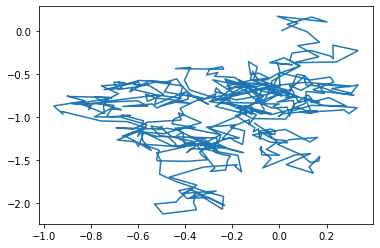

In [7]:
import matplotlib.pyplot as plt
plt.plot(traj2[0], traj2[1])

In [63]:
dx -> fun_dx(subs)

-0.1*x_symb*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2) - 1.02040816326531*(-0.2*x_symb*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) - 2*(0.04*x_symb + 2*y_symb/(x_symb**2 + y_symb**2))*(0.05*x_symb**2 + 0.05*y_symb**2)*cos(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)))*(-0.05*x_symb**2 - 0.05*y_symb**2 - 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**3

# List to bin

In [3]:
import pickle
import datetime
#data1 = traj
#data2 = traj2
def save_traj(data, filename=None):
    assert type(filename) == str or filename == None, "filename must be string"
    if filename == None:
        time_stamp = datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')
        filename = 'traj'+ datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')

    data_output = open(filename, 'wb')
    pickle.dump(data, data_output)
    data_output.close()

def read_traj(filename):
    data_input = open(filename, 'rb')
    read_data = pickle.load(data_input)
    data_input.close
    return read_data

In [28]:
save_traj(traj)


In [22]:
import datetime
filename = 'traj'+ datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S')

In [29]:
save_traj(traj2)


In [24]:
type('a')

str

In [4]:
traj1 = read_traj("traj2022-02-16T01-50-12")

In [32]:
# Validation
np.all(traj1 == traj)

True

In [8]:
print(traj1)

[[ 0.1         0.07538779  0.0503812  ...  9.87040799  9.99288651
  10.08108491]
 [ 0.1        -0.18388593 -0.13209521 ... 10.66579446 10.70177957
  10.60349559]]


In [1]:
def my_func(a,b=False):
    if b:
        return 0
    return a

In [3]:
my_func(1, True)

0

In [8]:
import sys
sys.path.append('..')
from test_accuracy import test_main

In [9]:
a,b = test_main()

  2%|▏         | 2/99 [00:00<00:07, 12.53it/s]

{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.0004820823669433594
part2: 0.0008699893951416016
part3: 1.4781951904296875e-05


  2%|▏         | 2/99 [00:00<00:06, 15.84it/s]

part4: 6.98592209815979
{y_symb, x_symb}
{y_symb, x_symb}
part1: 0.00015616416931152344
part2: 0.0012450218200683594
part3: 3.790855407714844e-05


100%|██████████| 99/99 [00:06<00:00, 14.71it/s]


part4: 6.729326009750366
单线程计算 共消耗: 13.72 秒
本地计算机有: 5 核心
多线程计算 共消耗: 7.49 秒


In [10]:
b

[{'task1': array([[ 0.01      , -0.06378601, -0.0213744 ,  0.15099128,  0.13752805,
           0.18909431,  0.27233237,  0.2777887 ,  0.40670868,  0.50580001,
           0.41633318,  0.47313424,  0.46390618,  0.54045964,  0.56359067,
           0.59266246,  0.53579641,  0.54168757,  0.5532748 ,  0.61732218,
           0.70857811,  0.7202956 ,  0.55246951,  0.62850565,  0.61561616,
           0.6544306 ,  0.66028283,  0.61966328,  0.62199499,  0.69971385,
           0.7379172 ,  0.78731149,  0.94212937,  1.00681347,  0.98642048,
           1.04523384,  1.0955632 ,  1.17603813,  1.24820811,  1.1524777 ,
           1.19752262,  1.11397453,  1.17665061,  1.16273487,  1.16435458,
           1.13520764,  1.12503591,  1.17015611,  1.06313351,  1.00953345,
           1.02308044,  1.12620679,  1.18634737,  1.17064087,  1.11587431,
           1.22672114,  1.35848663,  1.30952211,  1.24042477,  1.23542555,
           1.24371857,  1.27504211,  1.29126422,  1.4287995 ,  1.50004518,
           1.472

In [11]:
from matplotlib import pyplot as plt

TypeError: 'list' object is not callable

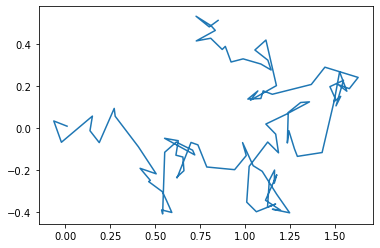

In [20]:
plt.plot(b[0]['task1'][0],b[0]['task1'][1])